# 20기 Time Series 정규세션 과제

### Electric_Production.csv 데이터를 활용하여 자유롭게 시계열분석을 진행해주세요.
첨부한 '시계열자료_실습.ipynb' 코드를 참고하셔도 좋습니다.


### Box-Jenkins 방법론
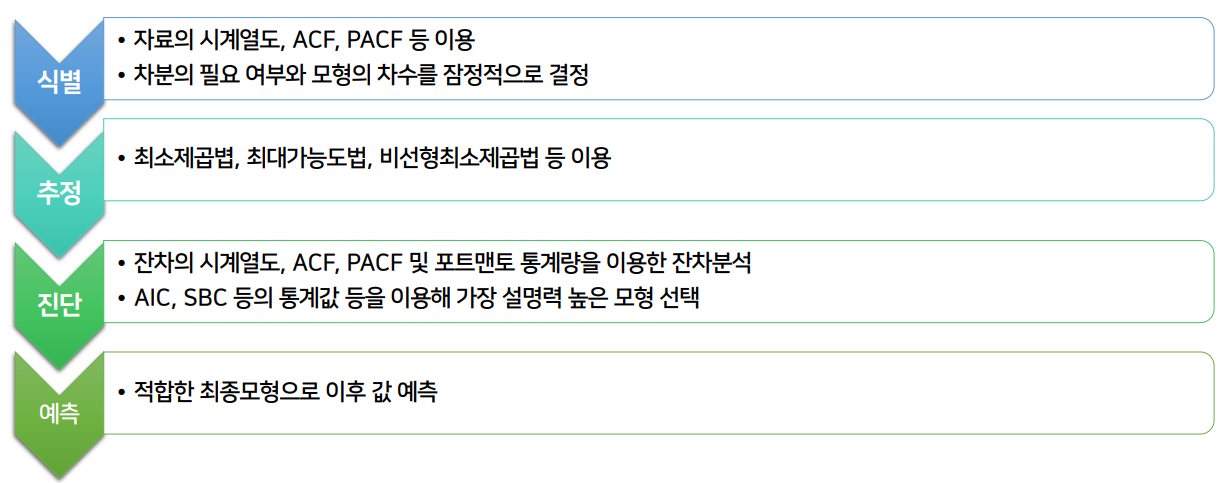

### Prophet
튜토리얼 : https://hyperconnect.github.io/2020/03/09/prophet-package.html

## 라이브러리 불러오기

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMAResults

/var/folders/cy/05syntbx0bg1y73qt_pm2d7c0000gn/T/ipykernel_26651/3886990561.py:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


## 데이터 불러오기

In [2]:
samsung_df = yf.download('005930.KS',
                      start='2020-01-01',
                      end='2021-04-21',
                      progress=False)

samsung_df = samsung_df[["Close"]]

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['day', 'price']

samsung_df['day'] = pd.to_datetime(samsung_df['day'])

samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)

samsung_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0


In [3]:
samsung_df.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-04-07', '2021-04-08', '2021-04-09', '2021-04-12',
               '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16',
               '2021-04-19', '2021-04-20'],
              dtype='datetime64[ns]', name='day', length=322, freq=None)

주식장이 평일에 열려서, 중간중간 2일치 데이터는 존재하지 않습니다.

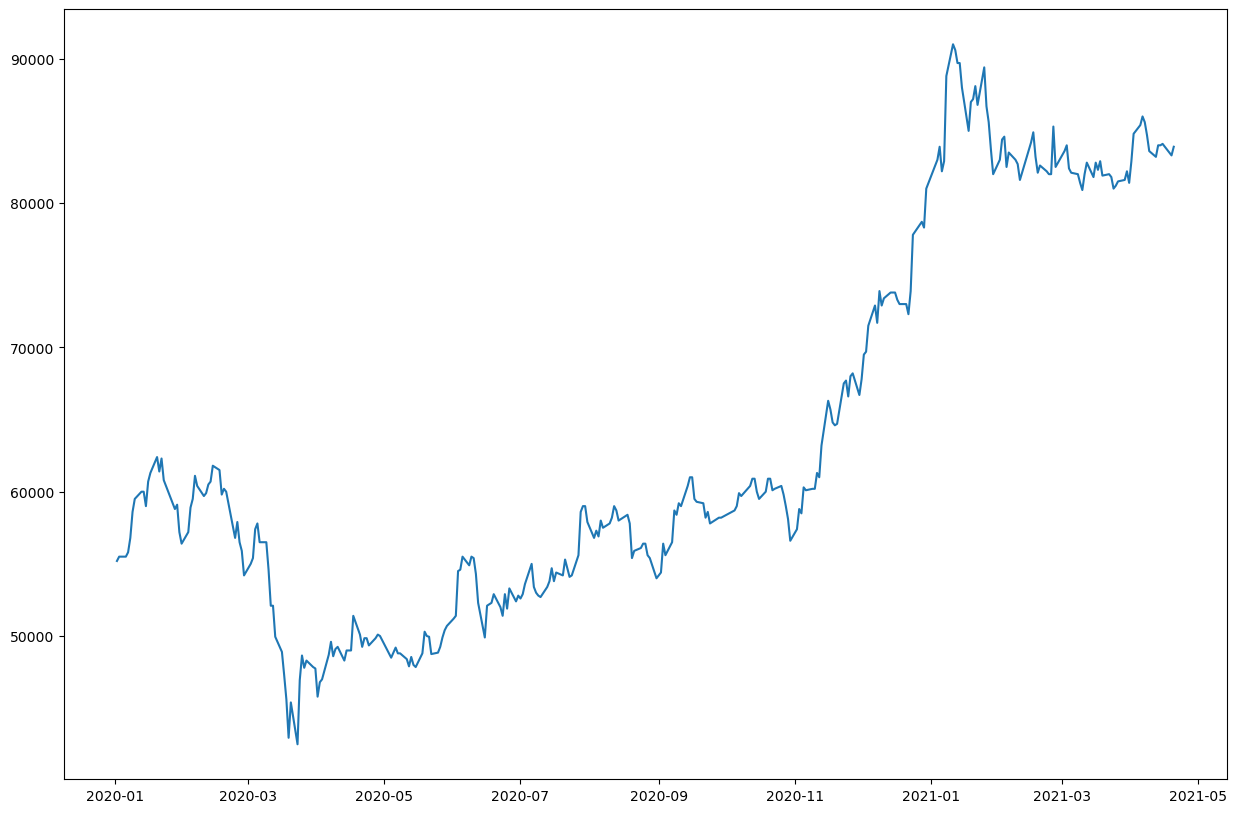

In [4]:
plt.figure(figsize=(15,10))
plt.plot(samsung_df.index, samsung_df["price"], linestyle="-")
plt.xlabel=("Dates")
plt.ylabel=("Price")
plt.show()

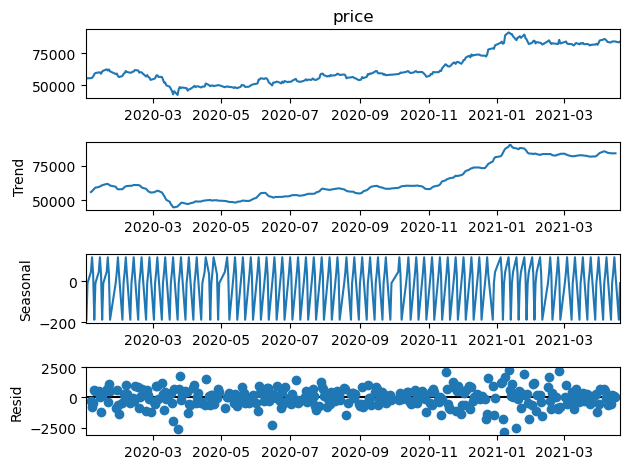

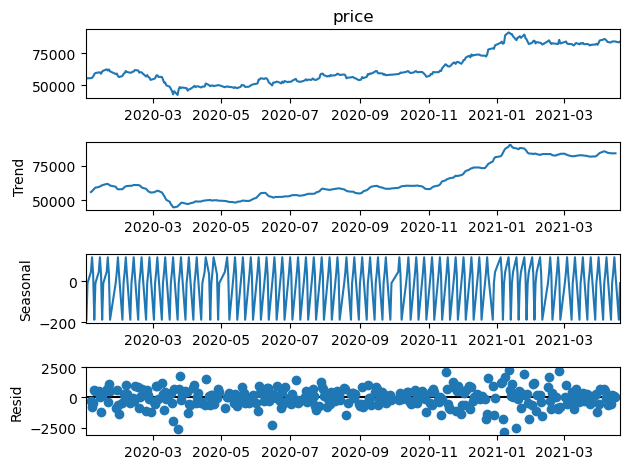

In [5]:
result_5 = seasonal_decompose(samsung_df["price"], model="add", period=5)
result_5.plot()

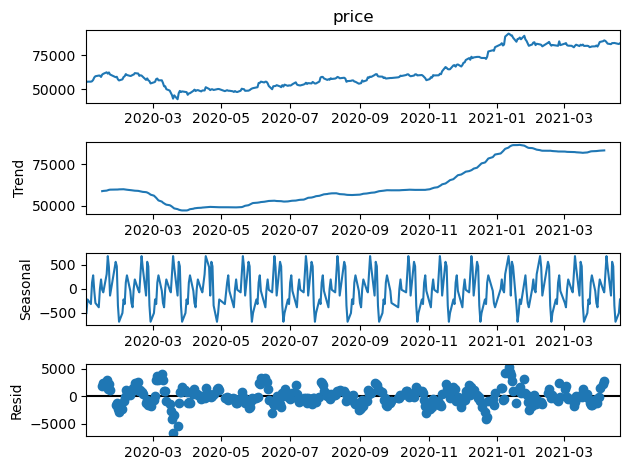

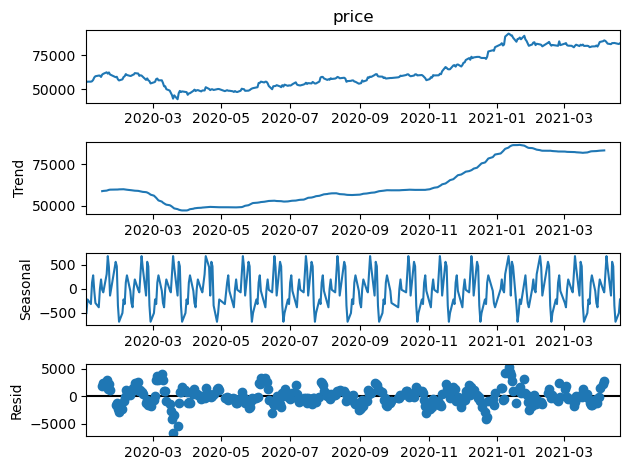

In [6]:
result_20 = seasonal_decompose(samsung_df["price"], model="add", period=20)
result_20.plot()

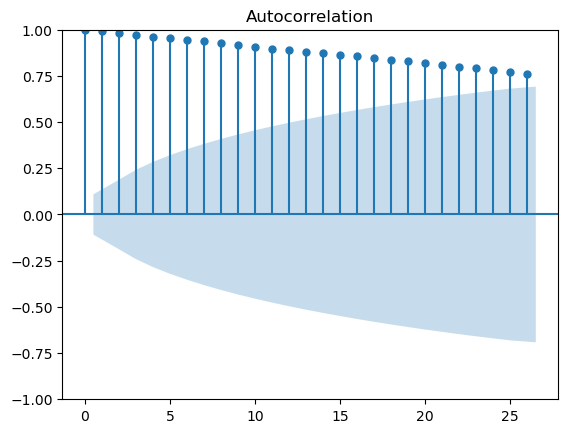

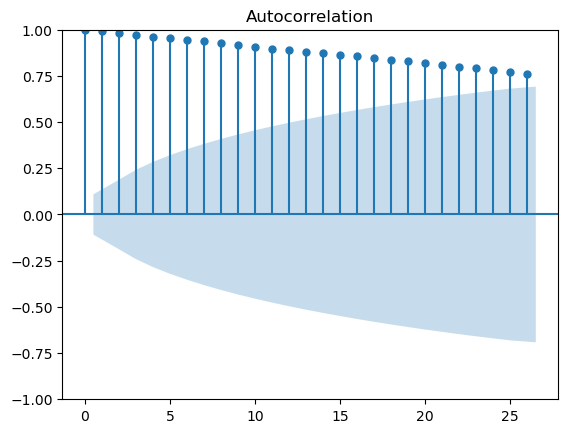

In [7]:
plot_acf(samsung_df["price"])

/usr/local/Caskroom/miniconda/base/envs/tobigs-regular-session/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


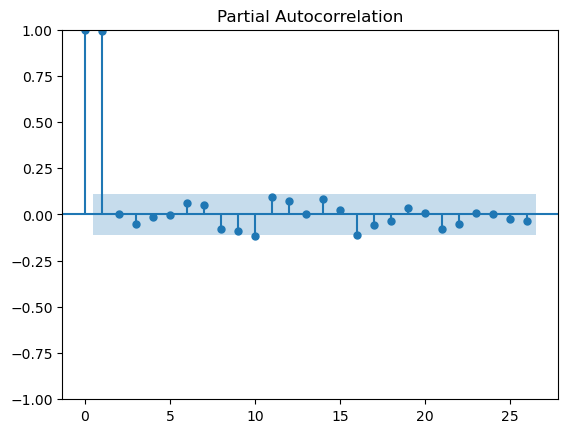

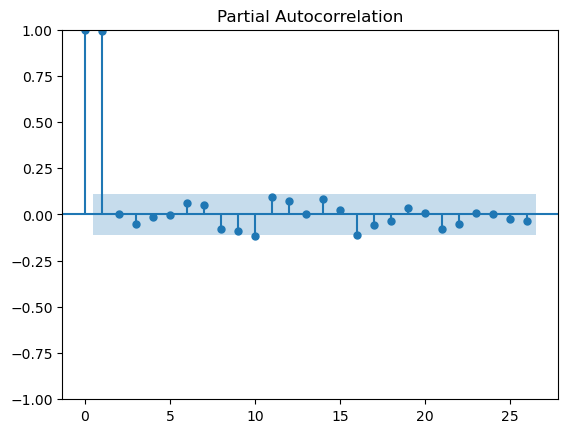

In [8]:
plot_pacf(samsung_df["price"])

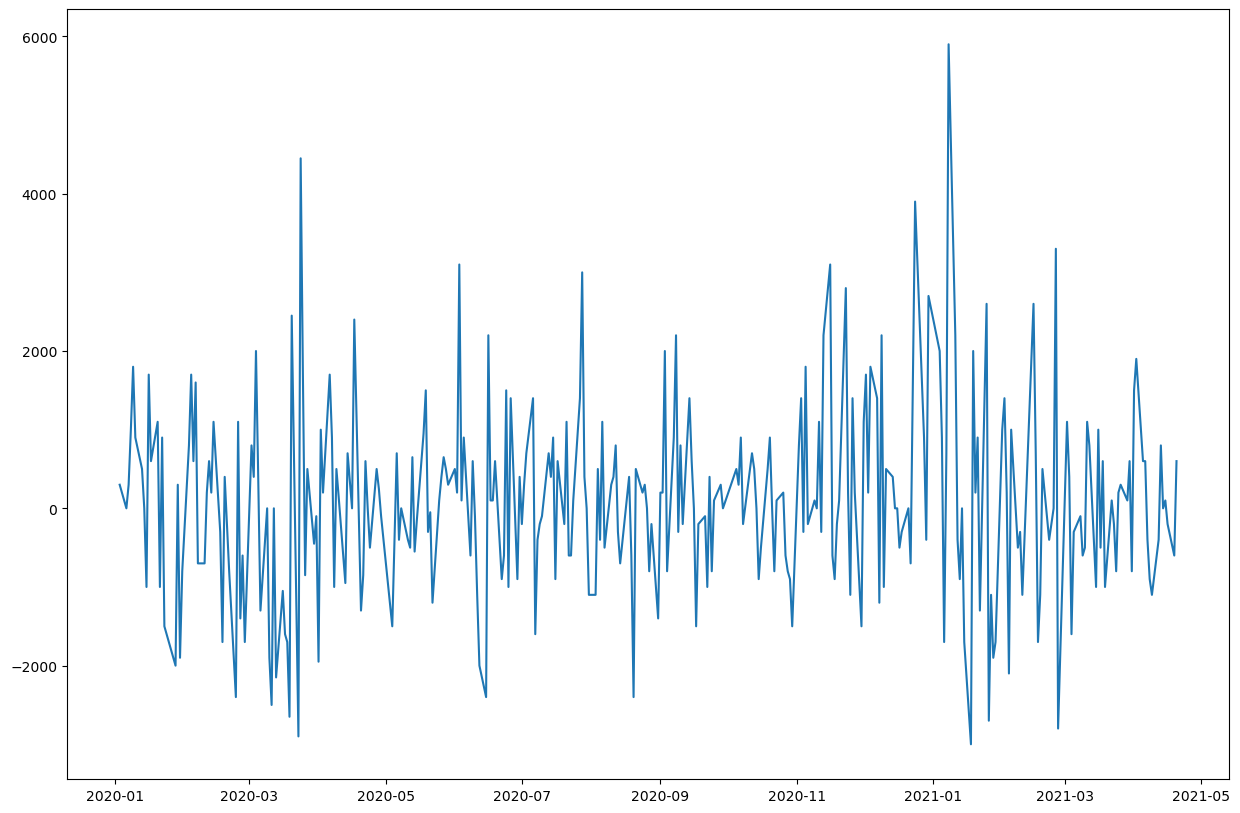

In [9]:
first_diff = samsung_df["price"].diff().dropna()

plt.figure(figsize=(15,10))
plt.plot(first_diff.index, first_diff, linestyle="-")
plt.xlabel=("Dates")
plt.ylabel=("Price")
plt.show()

In [10]:
first_diff

day
2020-01-03     300.0
2020-01-06       0.0
2020-01-07     300.0
2020-01-08    1000.0
2020-01-09    1800.0
               ...  
2021-04-14       0.0
2021-04-15     100.0
2021-04-16    -200.0
2021-04-19    -600.0
2021-04-20     600.0
Name: price, Length: 321, dtype: float64

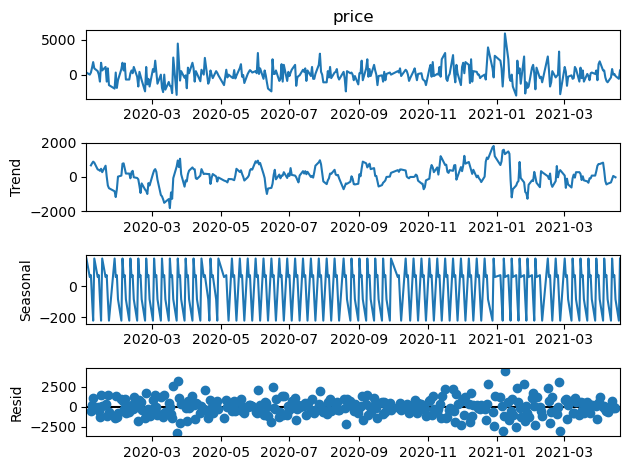

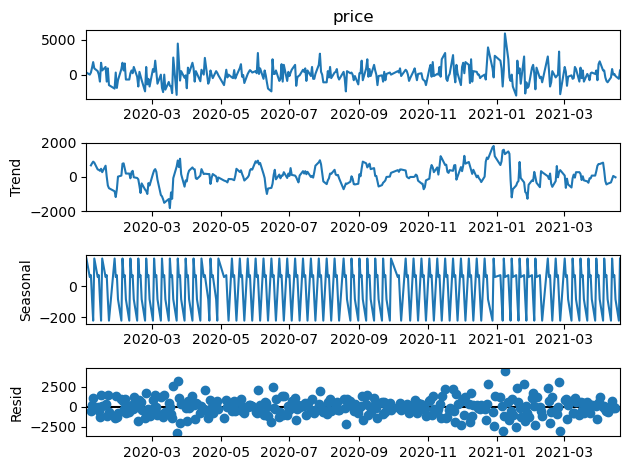

In [11]:
result_5 = seasonal_decompose(first_diff, model="add", period=5)
result_5.plot()

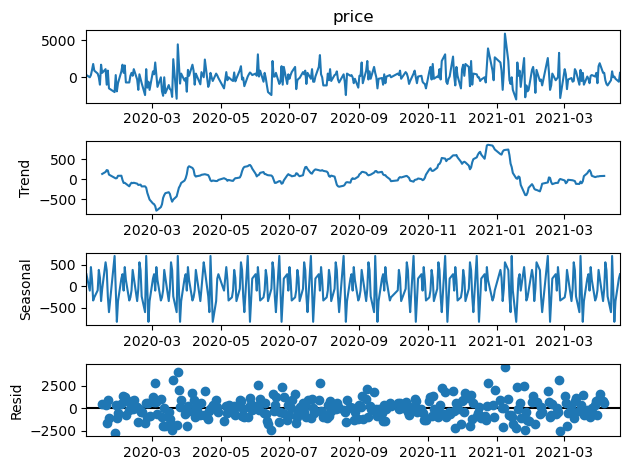

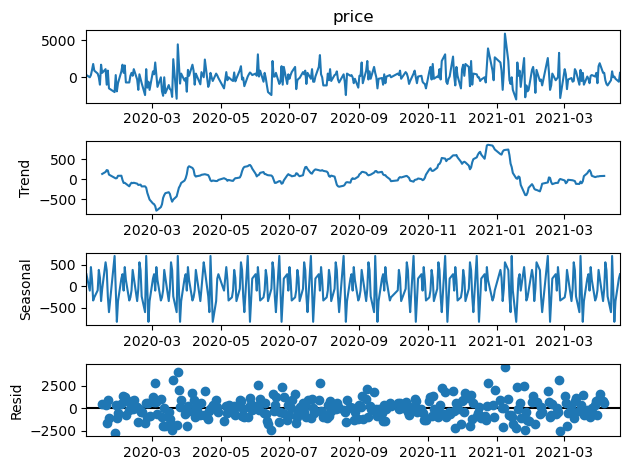

In [12]:
result_20 = seasonal_decompose(first_diff, model="add", period=20)
result_20.plot()

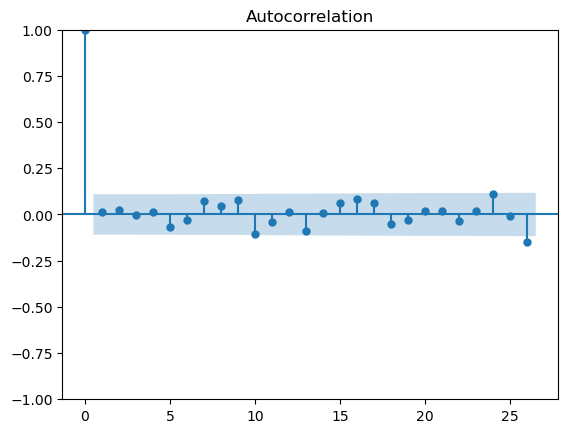

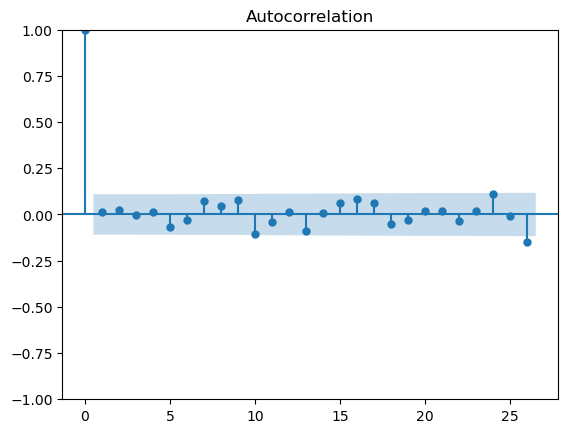

In [13]:
plot_acf(first_diff)

/usr/local/Caskroom/miniconda/base/envs/tobigs-regular-session/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


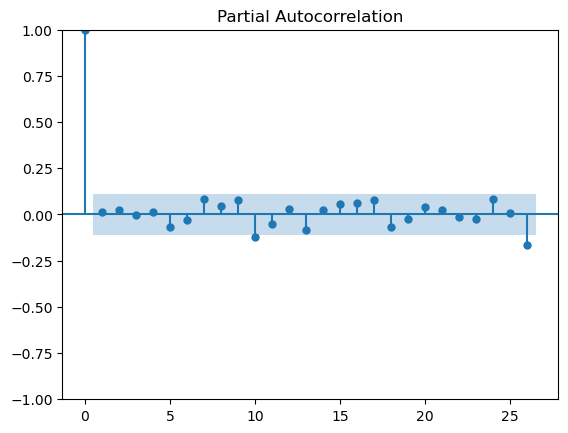

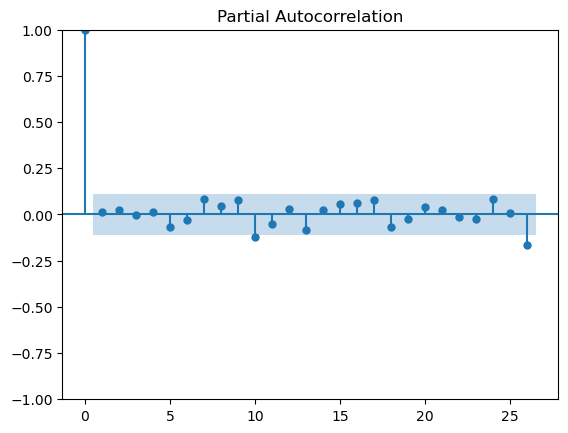

In [14]:
plot_pacf(first_diff)

In [15]:
train_data = samsung_df[:len(first_diff)-21]
test_data = samsung_df[len(first_diff)-21:]

In [16]:
arima_model = SARIMAX(train_data, order = (0,1,0), seasonal_order = (1,1,1,20))
arima_result = arima_model.fit()
arima_result.summary()

/usr/local/Caskroom/miniconda/base/envs/tobigs-regular-session/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/Caskroom/miniconda/base/envs/tobigs-regular-session/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.37630D+00    |proj g|=  9.28464D-01

At iterate    5    f=  8.18668D+00    |proj g|=  8.81358D-02

At iterate   10    f=  8.17846D+00    |proj g|=  1.15529D-03

At iterate   15    f=  8.17845D+00    |proj g|=  4.19685D-04

At iterate   20    f=  8.17829D+00    |proj g|=  1.51000D-02

At iterate   25    f=  8.17239D+00    |proj g|=  4.58775D-02

At iterate   30    f=  8.17042D+00    |proj g|=  6.81579D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                price   No. Observations:                  300
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 20)   Log Likelihood               -2451.124
Date:                              Wed, 30 Aug 2023   AIC                           4908.249
Time:                                      17:53:01   BIC                           4919.142
Sample:                                           0   HQIC                          4912.619
                                              - 300                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L20       0.4410      0.039     11.376      0.000       0.365       0.517
ma.S.L20      -0.8253      0.060    -13.661      0.000      -0.944      -0.707
sigma2      2.378e+06   1.73e+05     13.777      0.000    2.04e+06    2.72e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                24.04
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.08
Prob(H) (two-sided):                  0.70   Kurtosis:                         4.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

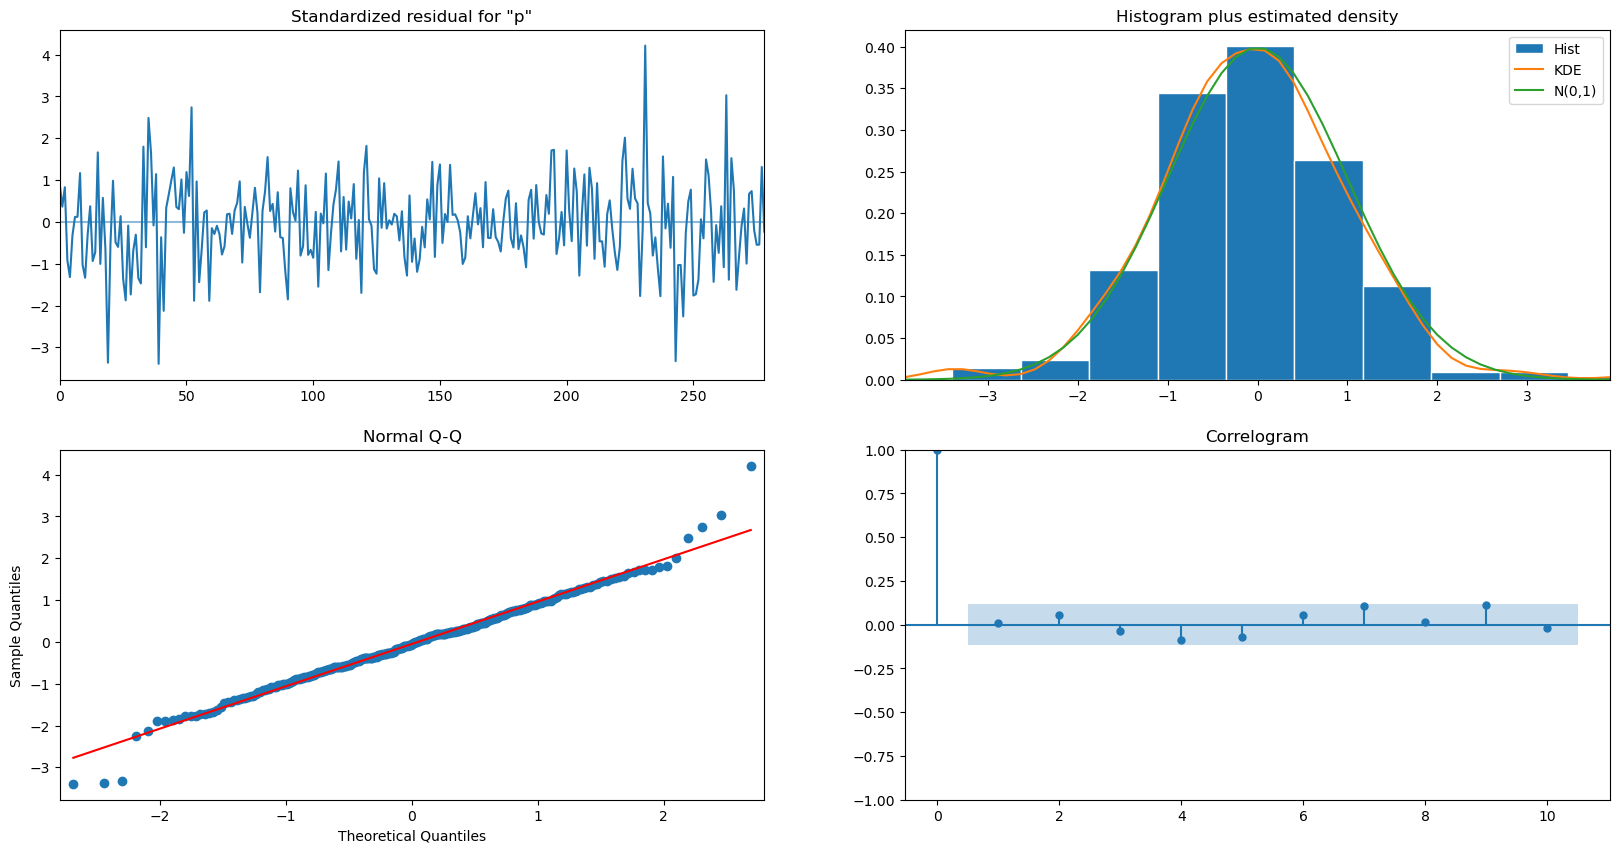

In [17]:
arima_result.plot_diagnostics(figsize=(20, 10))
plt.show()

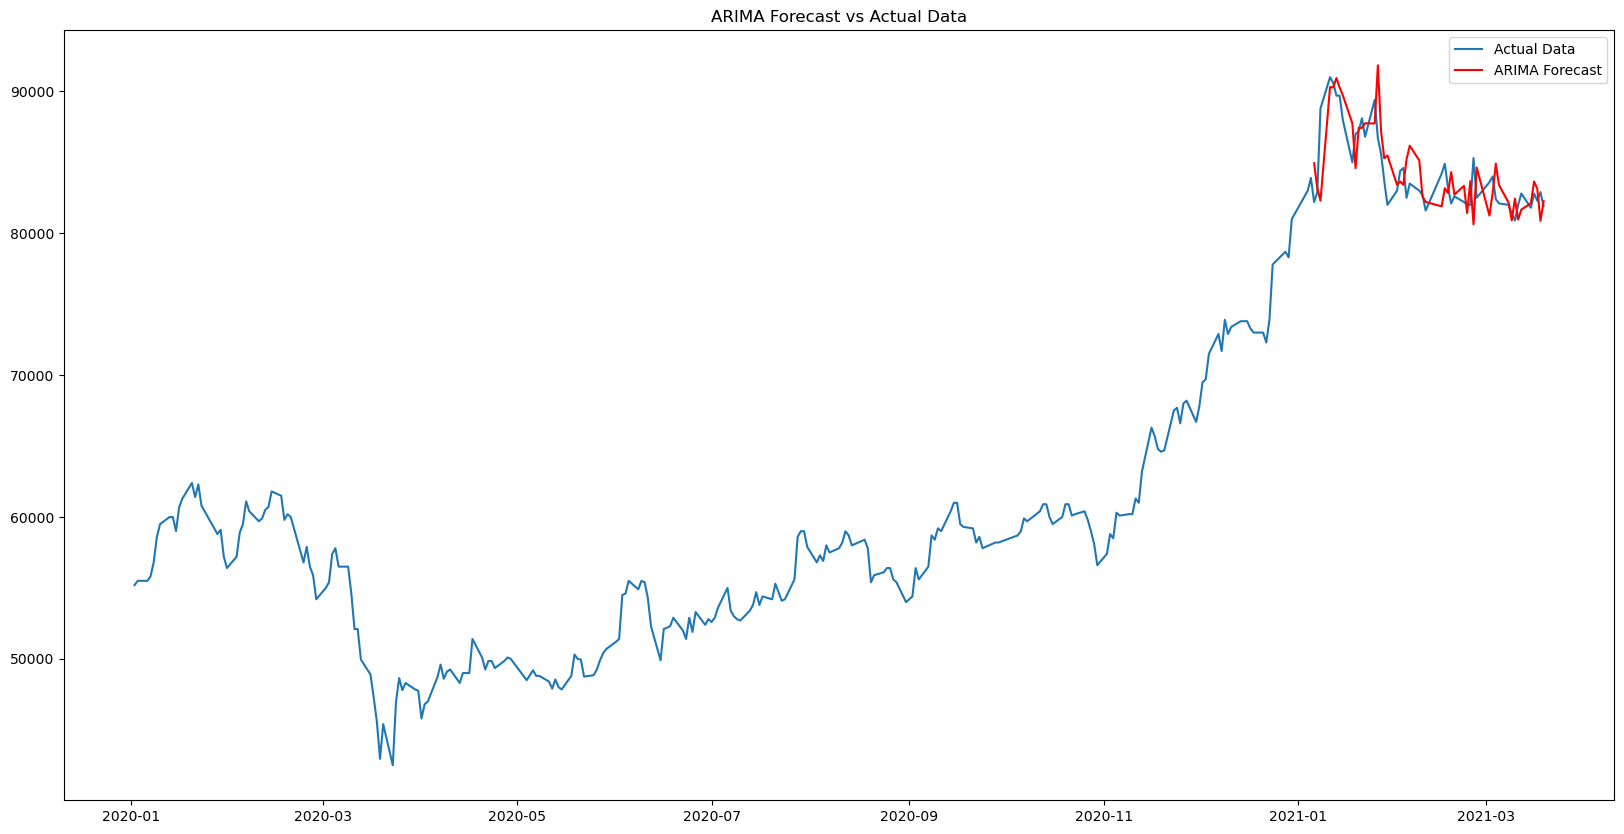

In [18]:
arima_pred = arima_result.get_prediction(
    start=pd.to_datetime('2021-01-06'),
    end=pd.to_datetime('2021-03-19'),
).predicted_mean

# 그래프 그리기
plt.figure(figsize=(20, 10))
plt.plot(train_data.index, train_data, label='Actual Data')
plt.plot(train_data.index[-50:], arima_pred, label='ARIMA Forecast', color='red')
plt.xlabel=("Dates")
plt.ylabel=("Price")
plt.title('ARIMA Forecast vs Actual Data')
plt.legend()
plt.show()